# INDIA VOICE CALL QUALITY EXPERIENCE DATSET

This dataset provides Customers Feedback Captured using TRAI MyCAll App. Customers rates their experience about telecom voice call quality in real time and help TRAI gather customer experience data along with Network data. The dataset includes feedback for the months September - November 2019

It is a good Dataset to do some EDA, especially if you wanna begin experimenting with Basemap. 

Lets Begin!

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

%matplotlib inline

### Data Loading and Understanding 

In [2]:
voice_call_sep = pd.read_csv('../input/voice-call-quality-experience-for-november-2019/MyCall_Data_September_2019.csv')
voice_call_sep.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,4,Satisfactory,12.691526,78.635086,Tamil Nadu
1,RJio,Outdoor,4G,4,Satisfactory,-1.000000,-1.000000,NaN
2,RJio,Outdoor,4G,4,Satisfactory,-1.000000,-1.000000,NaN
3,Airtel,Outdoor,4G,5,Satisfactory,25.594805,85.220971,Bihar
4,Airtel,Indoor,4G,5,Satisfactory,25.595471,85.221376,Bihar


In [3]:
voice_call_oct = pd.read_csv('../input/voice-call-quality-experience-for-november-2019/MyCall_Data_October_2019.csv')
voice_call_oct.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,5,Satisfactory,22.697315,88.366042,West Bengal
1,Airtel,Outdoor,Unknown,1,Call Dropped,17.481181,78.320934,Telangana
2,Vodafone,Indoor,4G,5,Satisfactory,17.424944,78.454569,Telangana
3,Vodafone,Indoor,Unknown,5,Satisfactory,10.022619,78.314640,Tamil Nadu
4,RJio,Travelling,4G,1,Poor Voice Quality,8.471879,76.978731,Kerala


In [4]:
voice_call_nov = pd.read_csv('../input/voice-call-quality-experience-for-november-2019/MyCall_Data_November_2019.csv')
voice_call_nov.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Travelling,4G,2,Poor Voice Quality,26.483777,80.319767,Uttar Pradesh
1,RJio,Outdoor,4G,5,Satisfactory,21.258587,81.567728,Chhattisgarh
2,RJio,Indoor,4G,2,Poor Voice Quality,-1.000000,-1.000000,NaN
3,BSNL,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN
4,BSNL,Outdoor,Unknown,4,Satisfactory,20.278975,85.836103,Odisha


In [5]:
# Shapes of the data across the three months

print(voice_call_sep.shape)
print(voice_call_oct.shape)
print(voice_call_nov.shape)

total_data = voice_call_sep.shape[0] + voice_call_oct.shape[0] + voice_call_nov.shape[0]


# Lets also print the % of data available across all months

print('\nPercentage-wise distribution in the three months: \n\nSept: {}%, \nOct: {}%, \nNov:{}%'.format(round(100* voice_call_sep.shape[0]/total_data, 2), 
                                         round(100* voice_call_oct.shape[0]/total_data, 2),
                                         round(100* voice_call_nov.shape[0]/total_data), 2))

(24616, 8)
(41062, 8)
(33812, 8)

Percentage-wise distribution in the three months: 

Sept: 24.74%, 
Oct: 41.27%, 
Nov:34%


We find that there are similar number of datapoints across all three months.

In [6]:
print('September data: ', voice_call_sep.isnull().sum())
print('\n\nOctober data: ', voice_call_oct.isnull().sum())
print('\n\nNovemeber data: ', voice_call_nov.isnull().sum())

September data:  Operator                 0
In Out Travelling        0
Network Type             0
Rating                   0
Call Drop Category       0
Latitude                 0
Longitude                0
State Name            5445
dtype: int64


October data:  Operator                 0
In Out Travelling        0
Network Type             0
Rating                   0
Call Drop Category       0
Latitude                 0
Longitude                0
State Name            7738
dtype: int64


Novemeber data:  Operator                 0
In Out Travelling        0
Network Type             0
Rating                   0
Call Drop Category       0
Latitude                 0
Longitude                0
State Name            7612
dtype: int64


We find that across all months the missing values belongs to the `State Name`.

Lets just replace this with `Unknown`. We shall do this once we concatenate these datasets.

### Data Visualization - both Univariate and Bivariate Analysis

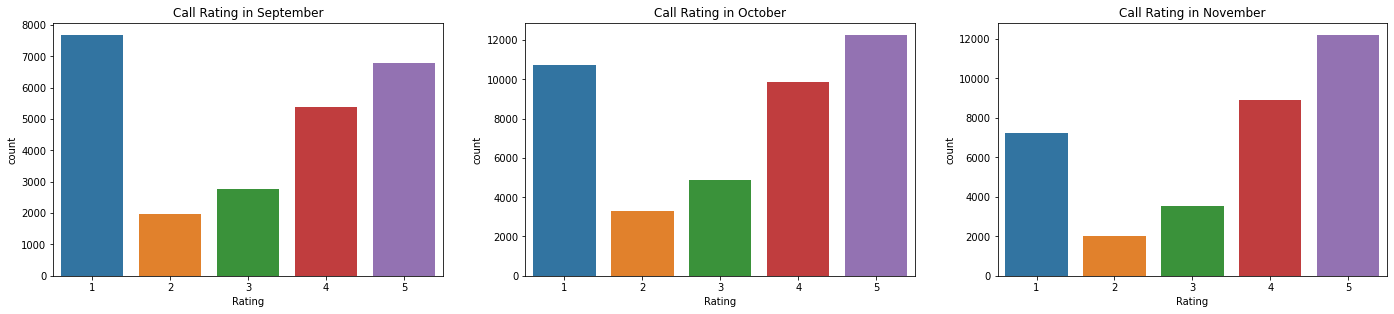

In [7]:
# RATING count across months

figure = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(voice_call_sep.Rating)
plt.title('Call Rating in September')

plt.subplot(1,3,2)
sns.countplot(voice_call_oct.Rating)
plt.title('Call Rating in October')

plt.subplot(1,3,3)
sns.countplot(voice_call_nov.Rating)
plt.title('Call Rating in November')

figure.tight_layout(pad = 3.0)

Looks like the most of the reported Call Ratings was poor in September (as this month has most low ratings). As of now, my guess is the low rating in september could be due to bad weather(as September in India still receives some rainfall in India), however given the technology age we are in, it should not be the sole reason.

In [8]:
# Lets see what Operators are present in our data for all three months
print(voice_call_sep.Operator.unique())
print(voice_call_oct.Operator.unique())
print(voice_call_nov.Operator.unique())

['RJio' 'Airtel' 'Vodafone' 'BSNL' 'Idea' 'Other' 'MTNL' 'Telenor']
['RJio' 'Airtel' 'Vodafone' 'Idea' 'BSNL' 'MTNL' 'Other' 'Telenor' 'Tata']
['RJio' 'BSNL' 'Idea' 'Airtel' 'Vodafone' 'Other' 'Telenor' 'MTNL']


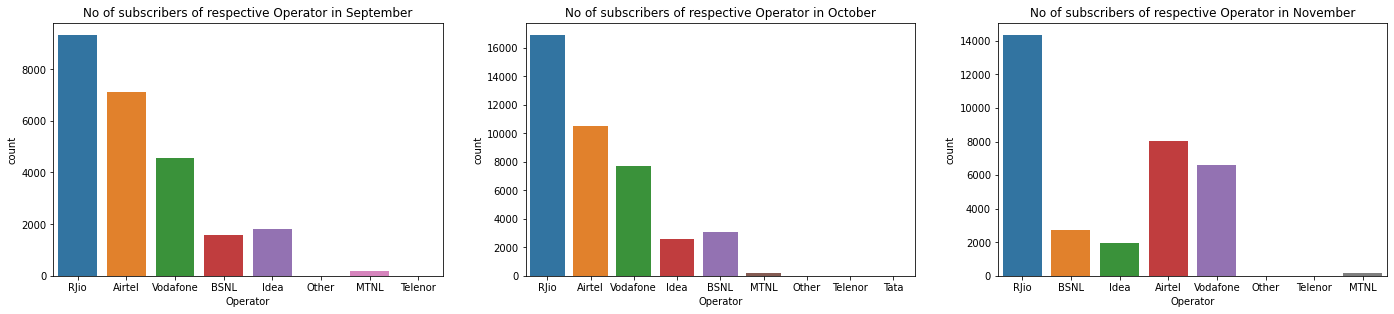

In [9]:
# Operator count across months

figure = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(voice_call_sep.Operator)
plt.title('No of subscribers of respective Operator in September')

plt.subplot(1,3,2)
sns.countplot(voice_call_oct.Operator)
plt.title('No of subscribers of respective Operator in October')

plt.subplot(1,3,3)
sns.countplot(voice_call_nov.Operator)
plt.title('No of subscribers of respective Operator in November')

figure.tight_layout(pad = 3.0)

There looks to be a class imbalance among some of the operators across months. We'll keep this mind.

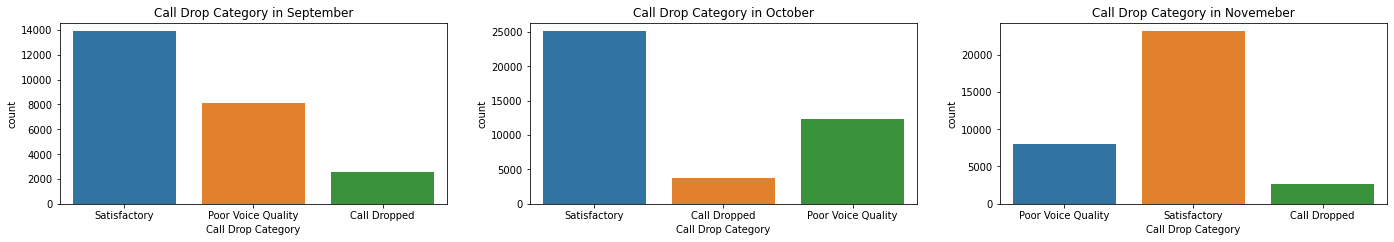

In [10]:
# Call Drop Category count across months

figure = plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
sns.countplot(voice_call_sep['Call Drop Category'])
plt.title('Call Drop Category in September')

plt.subplot(1,3,2)
sns.countplot(voice_call_oct['Call Drop Category'])
plt.title('Call Drop Category in October')

plt.subplot(1,3,3)
sns.countplot(voice_call_nov['Call Drop Category'])
plt.title('Call Drop Category in Novemeber')

figure.tight_layout(pad=3.0)

Most of the feedbacks are Satisfactory. Nothing worthwhile change across months

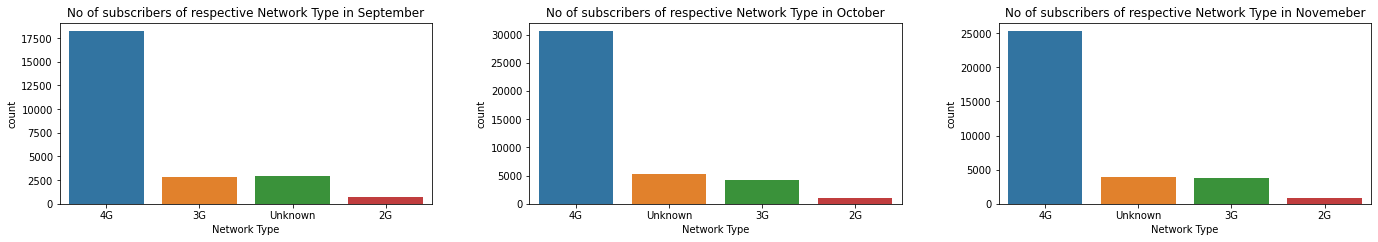

In [11]:
# Network Type count across months

figure = plt.figure(figsize = (20,4))

plt.subplot(1,3,1)
sns.countplot(voice_call_sep['Network Type'])
plt.title('No of subscribers of respective Network Type in September')

plt.subplot(1,3,2)
sns.countplot(voice_call_oct['Network Type'])
plt.title('No of subscribers of respective Network Type in October')

plt.subplot(1,3,3)
sns.countplot(voice_call_nov['Network Type'])
plt.title('No of subscribers of respective Network Type in Novemeber')

figure.tight_layout(pad=3.0)

We observe that are data majorly has data associated with `4G` Network type. Since our data is from 2019, this observation seems to be due to the fact that Reliance JIO shook the 2g/3g telecom market and promoted Indian mobile users to the latest LTE/ 4G network.

Also from the three graphs, there is no change in the distribution of the Network Type across months, which indicates that the indian users have already opted for their preferred network type (via operator change or otherwise) and there is no major churn visible.

<b>Now we are done with our analysis with these individual months. We shall now concatenate these datasets. </b>

In [12]:
# Lets concatenate the three month data to obr=tain a single dataset. But just in case we later need month related info, we will create a new column 'Month' 
# in all three datasets. We will drop these later if of no help.

voice_call_sep['Month'] = 'September'
voice_call_oct['Month'] = 'October'
voice_call_nov['Month'] = 'November'

frames = [voice_call_sep, voice_call_oct, voice_call_nov]
voice_call = pd.concat(frames)

In [13]:
voice_call.shape

(99490, 9)

We find that there are 99490 data entries.

#### Lets see if the class imbalance among the operators still exist after combining the three months data 

In [14]:
voice_call.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99490 entries, 0 to 33811
Data columns (total 9 columns):
Operator              99490 non-null object
In Out Travelling     99490 non-null object
Network Type          99490 non-null object
Rating                99490 non-null int64
Call Drop Category    99490 non-null object
Latitude              99490 non-null float64
Longitude             99490 non-null float64
State Name            78695 non-null object
Month                 99490 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [15]:
# Lets now replace the missing values in the `State Name` column
voice_call['State Name'].fillna('Unknown', inplace = True)

voice_call['State Name'].value_counts()

Unknown                        20795
Maharashtra                    15874
Uttar Pradesh                   8468
West Bengal                     7878
Telangana                       6839
Gujarat                         5281
NCT                             4710
Andhra Pradesh                  4551
Karnataka                       3816
Tamil Nadu                      3381
Rajasthan                       2549
Haryana                         2210
Uttarakhand                     2120
Punjab                          2052
Bihar                           1895
Kerala                          1380
Madhya Pradesh                  1335
Odisha                          1289
Jharkhand                        793
Goa                              685
Assam                            357
Chhattisgarh                     324
Chandigarh                       264
Himachal Pradesh                 228
Manipur                          193
Meghalaya                        103
Dhaka                             41
A

Note there are 37 state values (excluding `Unknown` there are 36). But some of them are not located in India like - `California`, `Gangwon-do`, `Lower Saxony`, `Dhaka`.
Since Operators corresponding to these locations are still India, I am guessing these are Indian nationals who have travelled to these places with their Operators still active somehow.

We shall remove these since we want to restrict our analysis to across India only (removing them wont have any impact as they are merley ~10 data entries)

In [16]:
voice_call = voice_call[~voice_call['State Name'].isin(['California', 'Gangwon-do', 'Lower Saxony', 'Dhaka'])]

Text(0.5, 1.0, 'Number of subscribers from respective States')

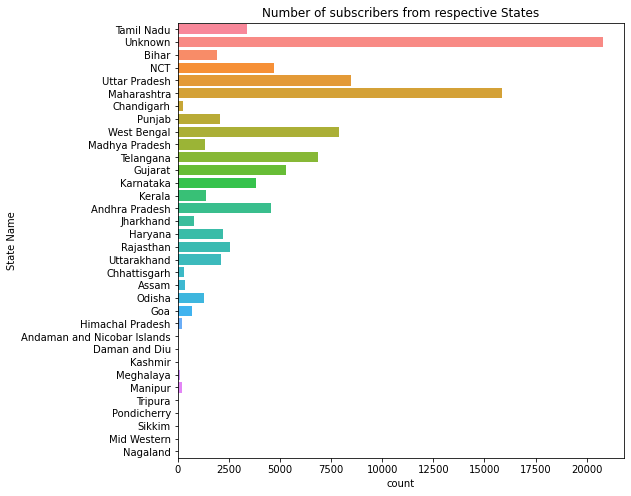

In [17]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'State Name', data = voice_call, saturation=1)
plt.title('Number of subscribers from respective States')

RJio        40556
Airtel      25642
Vodafone    18910
BSNL         7343
Idea         6354
MTNL          570
Other          34
Telenor        25
Tata            8
Name: Operator, dtype: int64


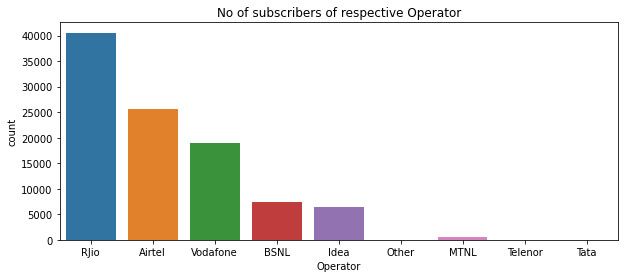

In [18]:
plt.figure(figsize = (10,4))

sns.countplot(voice_call.Operator)
plt.title('No of subscribers of respective Operator')

print(voice_call.Operator.value_counts())

Lets correct it now itself. We will rename the Operators - `MTNL`, `Other`, `Telenor`, `Tata` in one category called `Others`

In [19]:
voice_call['Operator'] = voice_call['Operator'].replace({'MTNL': 'Others', 'Other': 'Others', 'Telenor': 'Others', 'Tata': 'Others'})
voice_call.Operator.unique()

array(['RJio', 'Airtel', 'Vodafone', 'BSNL', 'Idea', 'Others'],
      dtype=object)

In [20]:
voice_call.groupby(['Operator'])['Rating'].count()

Operator
Airtel      25642
BSNL         7343
Idea         6354
Others        637
RJio        40556
Vodafone    18910
Name: Rating, dtype: int64

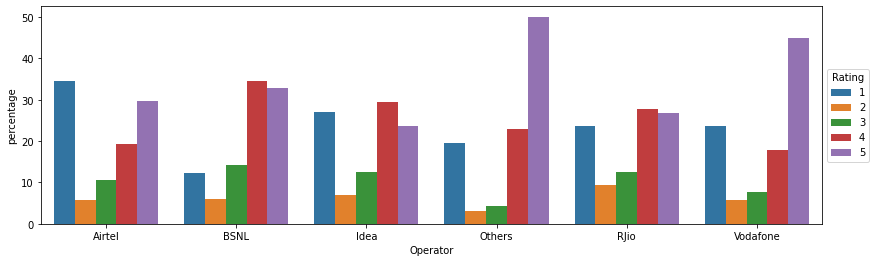

In [21]:
tempdf=voice_call.groupby(['Operator','Rating'])['Rating'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize = (14,4))
ax = sns.barplot(x = tempdf.Operator, y = tempdf.percentage, hue = tempdf.Rating)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title = 'Rating')

`Vodafone` has been given most good ratings by its users.

In [22]:
top_state_count_wise = list(voice_call.groupby(['State Name'])['Rating'].count().reset_index().sort_values(by = ['Rating'], ascending = False)['State Name'].head(10))

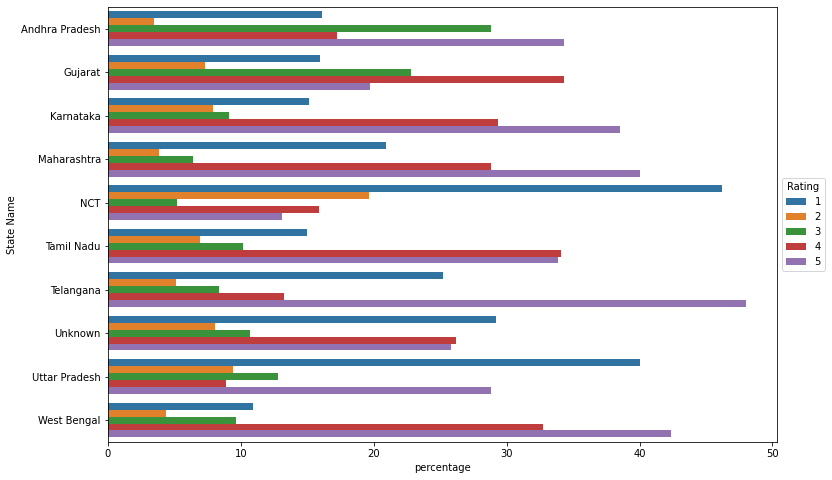

In [23]:
tempdf = voice_call.groupby(['State Name','Rating'])['Rating'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['State Name'].isin(top_state_count_wise)]
plt.figure(figsize = (12, 8))
ax = sns.barplot(y = tempdf['State Name'], x = tempdf.percentage, hue = tempdf.Rating)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title = 'Rating')


Some Observations:
    - Telangana, West Bengal and Maharashtra reported most good ratings.
    - Delhi (NCT) has had the worst ratings followed by Uttar Pradesh.
    

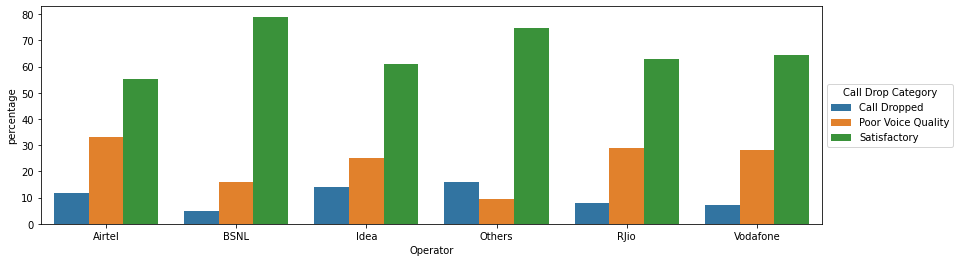

In [24]:
tempdf=voice_call.groupby(['Operator','Call Drop Category'])['Call Drop Category'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize = (14,4))
ax = sns.barplot(x = tempdf.Operator, y = tempdf.percentage, hue = tempdf['Call Drop Category'])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title = 'Call Drop Category')

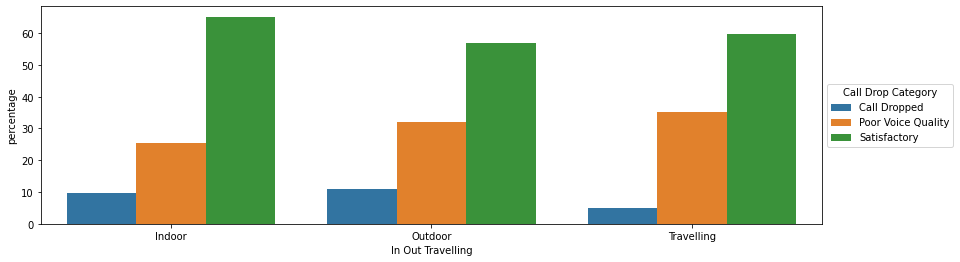

In [25]:
tempdf=voice_call.groupby(['In Out Travelling','Call Drop Category'])['Call Drop Category'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize = (14,4))
ax = sns.barplot(x = tempdf['In Out Travelling'], y = tempdf.percentage, hue = tempdf['Call Drop Category'])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title = 'Call Drop Category')

The Call Drop feedback is usually `Satisfactory`. 


Also the `Poor Voice Quality` is reported most while Travelling. This is intuitive as well, as we know that mwith mobility of a user, the network cells have to do frequenct handovers, this might have resulted in Large number of packet dropping, resulting in Poor Voice Quality. 

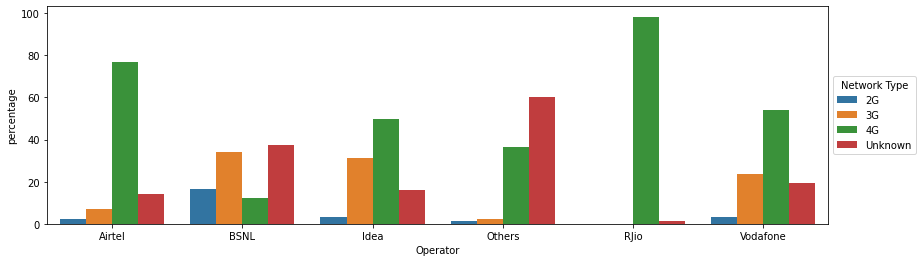

In [26]:
tempdf=voice_call.groupby(['Operator','Network Type'])['Network Type'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize = (14,4))
ax = sns.barplot(x = tempdf['Operator'], y = tempdf.percentage, hue = tempdf['Network Type'])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, title = 'Network Type')

As we already guessed, JIO is providing almost 98% of its service as 4G, Second most 4G service is being provided by Airtel.

BSNL is the only operator that still seems to hold some volume of 2g customers. 

In [27]:
# Lets just see what the mean value of Latitude and Longitude is.

print(voice_call[voice_call.Latitude != -1.000000].Latitude.mean())
print(voice_call[voice_call.Longitude != -1.000000].Longitude.mean())
# print(np.mode(voice_call[voice_call.Latitude != -1.000000].Latitude))
# print(np.mode(voice_call[voice_call.Longitude != -1.000000].Longitude))

21.58437288826542
78.38463755666555


These coordinates belong to Maharashtra. To replace the State Names that have `Unknown` name, substituting it with a median is surely not a good way (even though this median coordinate lies in Maharashtra, and Maharashtra has the largest data representation). For now, lets keep it as `Unknown`.

In [28]:
# We shall plot the distribution of Operators across India using Basemap

voice_call_Airtel = voice_call[voice_call.Operator == 'Airtel']
voice_call_BSNL = voice_call[voice_call.Operator == 'BSNL']
voice_call_Idea = voice_call[voice_call.Operator == 'Idea']
voice_call_RJio = voice_call[voice_call.Operator == 'RJio']
voice_call_Vodafone = voice_call[voice_call.Operator == 'Vodafone']
voice_call_Others = voice_call[voice_call.Operator == 'Others']


# Lets also store the lat/ Long coordinate corresponding to Operators.

lon_airtel, lat_airtel = list(voice_call_Airtel[voice_call_Airtel.Longitude != -1.000000].Longitude), list(voice_call_Airtel[voice_call_Airtel.Latitude != -1.000000].Latitude)
lon_bsnl, lat_bsnl = list(voice_call_BSNL[voice_call_BSNL.Longitude != -1.000000].Longitude), list(voice_call_BSNL[voice_call_BSNL.Latitude != -1.000000].Latitude)
lon_idea, lat_idea = list(voice_call_Idea[voice_call_Idea.Longitude != -1.000000].Longitude), list(voice_call_Idea[voice_call_Idea.Latitude != -1.000000].Latitude)
lon_rjio, lat_rjio = list(voice_call_RJio[voice_call_RJio.Longitude != -1.000000].Longitude), list(voice_call_RJio[voice_call_RJio.Latitude != -1.000000].Latitude)
lon_voda, lat_voda = list(voice_call_Vodafone[voice_call_Vodafone.Longitude != -1.000000].Longitude), list(voice_call_Vodafone[voice_call_Vodafone.Latitude != -1.000000].Latitude)
lon_others, lat_others = list(voice_call_Others[voice_call_Others.Longitude != -1.000000].Longitude), list(voice_call_Others[voice_call_Others.Latitude != -1.000000].Latitude)

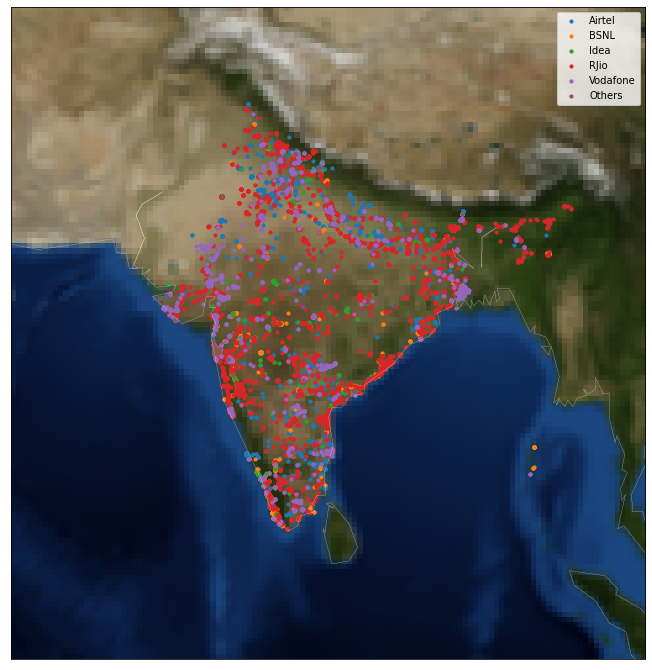

In [29]:
plt.figure(figsize=(20,12))
# fig.set_size_inches(8, 6.5)

map1 = Basemap(projection='merc',
            llcrnrlat=0, urcrnrlat=38,
            llcrnrlon=60, urcrnrlon=100,
            lat_ts=0,
            resolution='c')

map1.bluemarble(scale=0.2)   # full scale will be overkill
map1.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x_Airtel, y_Airtel = map1(lon_airtel, lat_airtel)
plt.scatter(x_Airtel, y_Airtel, 10, marker='o', color='#1f77b4', label = 'Airtel')

x_BSNL, y_BSNL = map1(lon_bsnl, lat_bsnl)
plt.scatter(x_BSNL, y_BSNL, 10, marker='o', color='#ff7f0e', label = 'BSNL')

x_Idea, y_Idea = map1(lon_idea, lat_idea)
plt.scatter(x_Idea, y_Idea, 10, marker='o', color='#2ca02c', label = 'Idea')

x_RJio, y_RJio = map1(lon_rjio, lat_rjio) 
plt.scatter(x_RJio, y_RJio, 10, marker='o', color='#d62728', label = 'RJio')

x_Vodafone, y_Vodafone = map1(lon_voda, lat_voda)
plt.scatter(x_Vodafone, y_Vodafone, 10, marker='o', color='#9467bd', label = 'Vodafone')

x_Others, y_Others = map1(lon_others, lat_others)
plt.scatter(x_Others, y_Others, 10, marker='o', color='#8c564b', label = 'Others')        

plt.legend()
plt.show()

Notice how RJIO dominates the subscribers across India, but a little scarce in the middle (MP, Rajasthan).

In [30]:
# We shall plot the distribution of Ratings across India using Basemap

voice_call_Rating1 = voice_call[voice_call.Rating == 1]
voice_call_Rating2 = voice_call[voice_call.Rating == 2]
voice_call_Rating3 = voice_call[voice_call.Rating == 3]
voice_call_Rating4 = voice_call[voice_call.Rating == 4]
voice_call_Rating5 = voice_call[voice_call.Rating == 5]


# Lets also store the lat/ Long coordinate corresponding to ratings.

lon_rat1, lat_rat1 = list(voice_call_Rating1[voice_call_Rating1.Longitude != -1.000000].Longitude), list(voice_call_Rating1[voice_call_Rating1.Latitude != -1.000000].Latitude)
lon_rat2, lat_rat2 = list(voice_call_Rating2[voice_call_Rating2.Longitude != -1.000000].Longitude), list(voice_call_Rating2[voice_call_Rating2.Latitude != -1.000000].Latitude)
lon_rat3, lat_rat3 = list(voice_call_Rating3[voice_call_Rating3.Longitude != -1.000000].Longitude), list(voice_call_Rating3[voice_call_Rating3.Latitude != -1.000000].Latitude)
lon_rat4, lat_rat4 = list(voice_call_Rating4[voice_call_Rating4.Longitude != -1.000000].Longitude), list(voice_call_Rating4[voice_call_Rating4.Latitude != -1.000000].Latitude)
lon_rat5, lat_rat5 = list(voice_call_Rating5[voice_call_Rating5.Longitude != -1.000000].Longitude), list(voice_call_Rating5[voice_call_Rating5.Latitude != -1.000000].Latitude)

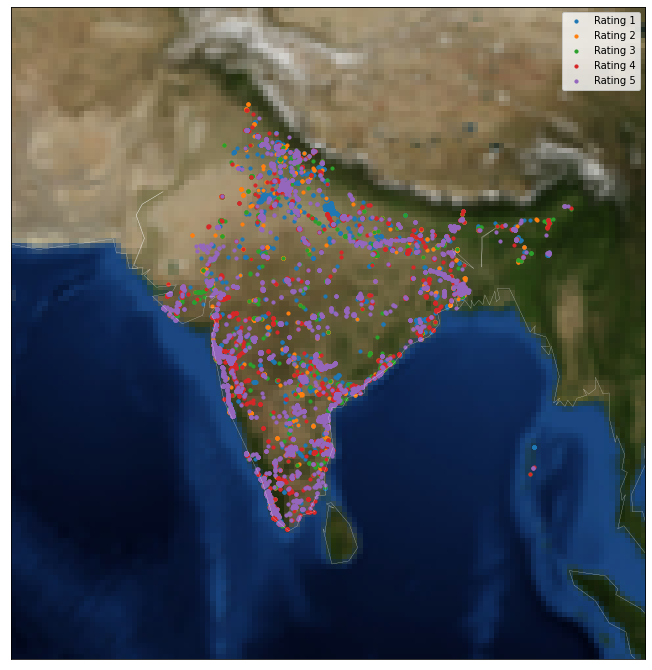

In [31]:
plt.figure(figsize=(20,12))

map2 = Basemap(projection='merc',
            llcrnrlat=0, urcrnrlat=38,
            llcrnrlon=60, urcrnrlon=100,
            lat_ts=0,
            resolution='c')

map2.bluemarble(scale=0.2)   # full scale will be overkill
map2.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

x_rat1, y_rat1 = map2(lon_rat1, lat_rat1)
plt.scatter(x_rat1, y_rat1, 10, marker='o', color='#1f77b4', label = 'Rating 1')

x_rat2, y_rat2 = map2(lon_rat2, lat_rat2)
plt.scatter(x_rat2, y_rat2, 10, marker='o', color='#ff7f0e', label = 'Rating 2')

x_rat3, y_rat3 = map2(lon_rat3, lat_rat3)
plt.scatter(x_rat3, y_rat3, 10, marker='o', color='#2ca02c', label = 'Rating 3')

x_rat4, y_rat4 = map2(lon_rat4, lat_rat4) 
plt.scatter(x_rat4, y_rat4, 10, marker='o', color='#d62728', label = 'Rating 4')

x_rat5, y_rat5 = map2(lon_rat5, lat_rat5)
plt.scatter(x_rat5, y_rat5, 10, marker='o', color='#9467bd', label = 'Rating 5')       

plt.legend()
plt.show()

Notice the purple points in majority, indicating Rating5 reported by most of the mobile subscribers. 

This shows that the Voice Quality via services across different Networks offered by different Operators is very good.